<a href="https://colab.research.google.com/github/vivekkishore/machinelearning/blob/main/langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Langsmith Part 1

In [ ]:
!pip install langsmith langgraph langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_key = userdata.get('groq_key')
langsmith_key = userdata.get('langchain_key')

In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_key
os.environ["LANGCHAIN_TRACING_V2"] = 'true'
os.environ["LANGCHAIN_PROJECT"] = 'langmithp1'
os.environ["GROQ_API_KEY"]=groq_key
from langchain_groq import ChatGroq
llm=ChatGroq(model='Gemma2-9b-It')
# llm.invoke("who are you? how are you different than Gemini")

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [ ]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph=graph_builder.compile()

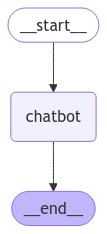

In [ ]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    # print(event.values())
    for value in event.values():
      # print(value['messages'])
      print("Assistant:",value["messages"].content)

User: who are you?
Assistant: I am Gemma, an open-weights AI assistant. I am a large language model trained by Google DeepMind. My purpose is to help users by understanding and responding to their requests in a helpful, informative, and comprehensive way.

Here are some key things to know about me:

* **Open-weights:** My weights are publicly available, meaning anyone can access and study them.
* **Text-only:** I can only communicate through text. I can't generate images, sound, or videos.
* **Limited knowledge:** My knowledge is based on the data I was trained on, which has a cutoff point. I don't have access to real-time information or the ability to search the internet.
* **Created by the Gemma team:** I was developed by a team of engineers and researchers at Google DeepMind.

I'm always learning and improving, and I'm excited to see how people use me to explore new ideas and accomplish their goals.

User: answer earlier question differently
Assistant: Please provide me with the ear

###Langsmith Part 2

In [8]:
!pip install langsmith langgraph langchain langchain_groq langchain_community wikipedia arxiv
from google.colab import userdata
groq_key = userdata.get('groq_key')
langsmith_key = userdata.get('langchain_key')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.3 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=4df8892a7b351775495d3f73e87401b12d5ad9a1f124769aa30e367204392fd8
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [16]:
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_community.tools import WikipediaQueryRun,ArxivQueryRun

wiki_tool=WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=3,doc_content_chars_max=400 ))
Arxiv_tool=ArxivQueryRun(api_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=400 ))

tools=[wiki_tool,Arxiv_tool]
# wiki_tool.invoke("who is amir khan")
# Arxiv_tool.invoke("Attention is all you need")

In [24]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_key
os.environ["LANGCHAIN_TRACING_V2"] = 'true'
os.environ["LANGCHAIN_PROJECT"] = 'langmithp2'
os.environ["GROQ_API_KEY"]=groq_key
from langchain_groq import ChatGroq
llm=ChatGroq(model='Gemma2-9b-It')
llm_tools=llm.bind_tools(tools=tools)

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages:Annotated[list, add_messages]

graph_builer=StateGraph(State)